In [ ]:
import pandas as pd
import seaborn as sns

In [74]:
coasters = pd.read_excel("Roller Coaster Data.xlsx", sheet_name=0)
locations = pd.read_excel("Roller Coaster Data.xlsx", sheet_name=1)

In [58]:
coasters.head()

,Coaster_Name,Coaster_Park,Drop_Height,Top_Speed,Avg_Speed,Duration,Capacity,Type,Year_Const,Material,Inversion_Num,Breakdowns,Wait_Time,Height_Req,Orientation,Drive_Mech,num_coasters
0,Geist Schmelzen,Beschleunigungszone,199,144.362,91.536,171.58,40,Outdoors,2010,Steel,17,8,58.376,42.0,Sitting,Electromagnetic,9
1,Overdrive,Horsepower Bay,126,75.492,54.376,99.73,36,Indoors,2004,Steel,8,23,22.415,NaN,Standing,Hydraulic,3
2,Fifth Gear,Horsepower Bay,124,64.446,42.867,141.24,20,Outdoors,2002,Steel,11,24,29.393,42.0,Sitting,Hydraulic,3
3,Barco No Rio Amazonas,Cidade Da Velocidade,197,129.226,80.908,152.51,24,Outdoors,2010,Steel,10,11,78.880,NaN,Standing,Electromagnetic,6
4,The Mind Melter,Treasure Island,349,61.581,66.966,142.51,28,Outdoors,1996,Steel,11,47,43.917,36.0,Sitting,Mechanical,10


In [18]:
locations.head()

,Coaster_Park,Park_Country,Park_Region,Park_City,Admission_Price,Admission_Num,Avg_Temp,Avg_Rainfall,Rain_Days,Age_1_25,...,Age_3_25,Age_4_25,Age_1_50,Age_2_50,Age_3_50,Age_4_50,Male_25,Female_25,Male_50,Female_50
0,Funville,United States,Texas,Arlington,45.000,923943,77.54,38.36,48.55,130810,...,75315,23784,144446,194254,104599,54790,195638,200756,242875,255214
1,Swamp Valley Thrill Zone,United States,Louisiana,Baton Rouge,30.000,525327,75.13,49.58,178.11,56345,...,28172,30426,187627,167343,91278,60852,115448,109930,265562,241538
2,Beschleunigungszone,Germany,Hesse,Frankfurt,23.168,1707802,52.69,24.77,72.61,139211,...,230797,117230,170873,290484,256310,136699,378166,354522,427061,427305
3,Sharkie Shoals,United States,Florida,Clearwater,40.000,1291517,72.64,52.60,187.97,24741,...,21497,30309,159981,249624,119411,111305,59703,55809,325581,314740
4,Horsepower Bay,United States,Michigan,Ann Arbor,30.000,795173,49.78,37.55,160.19,26342,...,50253,17326,284985,276150,189599,116426,60343,61134,450650,416510


In [ ]:
# join coaster data
all_data = pd.merge(coasters, locations, on="Coaster_Park")

In [ ]:
# make sure shape of all data is as expected 
print(coasters.shape)
print(locations.shape)
print(all_data.shape)

Text(0, 0.5, 'Revenue (Hundreds of Millions)')

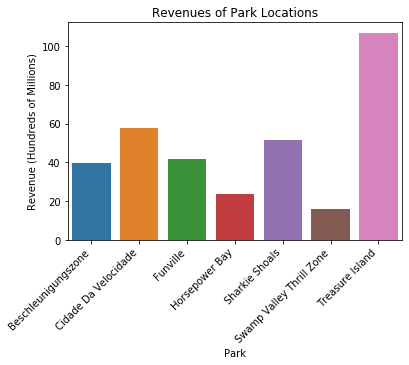

In [75]:
# explore location data 
locations = locations.set_index("Coaster_Park").sort_index()
locations_revenue = locations["Admission_Num"] * locations["Admission_Price"] / 1000000
rev_plot = sns.barplot(x=locations_revenue.index, y=locations_revenue)
rev_plot.set_xticklabels(rev_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
rev_plot.set_title("Revenues of Park Locations")
rev_plot.set_xlabel("Park")
rev_plot.set_ylabel("Revenue (Hundreds of Millions)")


In [54]:
# How can we create a metric for success of coaster? 
# Revenue per coaster?

# only need the length of each group, so .agg(count) unnecessary
coasters.groupby("Coaster_Park").transform("count")


Coaster_Park
Beschleunigungszone          9
Cidade Da Velocidade         6
Funville                     8
Horsepower Bay               3
Sharkie Shoals               8
Swamp Valley Thrill Zone     7
Treasure Island             10
dtype: int64

In [78]:
coasters["num_coasters"] = coasters.groupby("Coaster_Park")["Coaster_Park"].transform("count")
coasters.head() 

,Coaster_Name,Coaster_Park,Drop_Height,Top_Speed,Avg_Speed,Duration,Capacity,Type,Year_Const,Material,Inversion_Num,Breakdowns,Wait_Time,Height_Req,Orientation,Drive_Mech,num_coasters
0,Geist Schmelzen,Beschleunigungszone,199,144.362,91.536,171.58,40,Outdoors,2010,Steel,17,8,58.376,42.0,Sitting,Electromagnetic,9
1,Overdrive,Horsepower Bay,126,75.492,54.376,99.73,36,Indoors,2004,Steel,8,23,22.415,NaN,Standing,Hydraulic,3
2,Fifth Gear,Horsepower Bay,124,64.446,42.867,141.24,20,Outdoors,2002,Steel,11,24,29.393,42.0,Sitting,Hydraulic,3
3,Barco No Rio Amazonas,Cidade Da Velocidade,197,129.226,80.908,152.51,24,Outdoors,2010,Steel,10,11,78.880,NaN,Standing,Electromagnetic,6
4,The Mind Melter,Treasure Island,349,61.581,66.966,142.51,28,Outdoors,1996,Steel,11,47,43.917,36.0,Sitting,Mechanical,10


In [84]:
all_data = pd.merge(coasters, locations, on="Coaster_Park").sort_values(by="Coaster_Park")
all_data["hourly_capacity"] = all_data["Capacity"] / all_data["Duration"] * 3600
all_data["park_capacity"] = all_data.groupby("Coaster_Park")["hourly_capacity"].transform("sum")
all_data["success_metric"] = ( (all_data["hourly_capacity"] / all_data["park_capacity"]) *
                             (all_data["Admission_Num"]*all_data["Admission_Price"] / all_data["num_coasters"]) *
                             (1 / all_data["Breakdowns"]) ) 
all_data.head()

,Coaster_Name,Coaster_Park,Drop_Height,Top_Speed,Avg_Speed,Duration,Capacity,Type,Year_Const,Material,...,Age_2_50,Age_3_50,Age_4_50,Male_25,Female_25,Male_50,Female_50,hourly_capacity,park_capacity,success_metric
0,Geist Schmelzen,Beschleunigungszone,199,144.362,91.536,171.58,40,Outdoors,2010,Steel,...,290484,256310,136699,378166,354522,427061,427305,839.258655,6981.415655,66061.114909
1,Slalom Fahren,Beschleunigungszone,175,93.807,63.231,120.86,20,Outdoors,2008,Steel,...,290484,256310,136699,378166,354522,427061,427305,595.730597,6981.415655,37513.705432
2,Berg Jodler,Beschleunigungszone,172,136.491,96.424,134.74,36,Outdoors,2005,Steel,...,290484,256310,136699,378166,354522,427061,427305,961.852457,6981.415655,35628.668674
3,Splittergeschwindigkeit,Beschleunigungszone,192,90.593,50.071,109.98,20,Outdoors,2009,Steel,...,290484,256310,136699,378166,354522,427061,427305,654.664484,6981.415655,41224.826682
4,Fallschirmspringen,Beschleunigungszone,175,102.056,75.726,86.75,24,Outdoors,1996,Steel,...,290484,256310,136699,378166,354522,427061,427305,995.965418,6981.415655,14585.316604


[Text(0, 0, 'Beschleunigungszone'),
 Text(0, 0, 'Cidade Da Velocidade'),
 Text(0, 0, 'Funville'),
 Text(0, 0, 'Horsepower Bay'),
 Text(0, 0, 'Sharkie Shoals'),
 Text(0, 0, 'Swamp Valley Thrill Zone'),
 Text(0, 0, 'Treasure Island')]

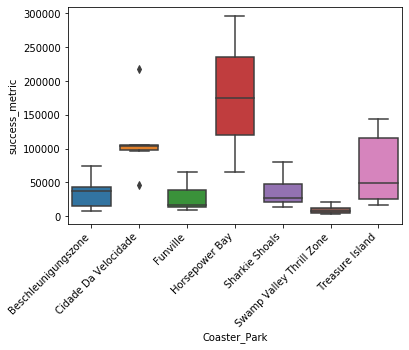

In [85]:
success_dist = sns.boxplot(x="Coaster_Park", y="success_metric", data=all_data)
success_dist.set_xticklabels(success_dist.get_xticklabels(), rotation=45, horizontalalignment='right')

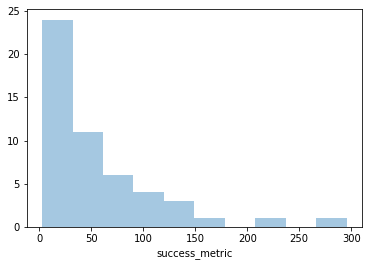

In [87]:
sns.distplot(all_data["success_metric"] / 1000, kde=False)

In [88]:
all_data.columns

Index(['Coaster_Name', 'Coaster_Park', 'Drop_Height', 'Top_Speed', 'Avg_Speed',
       'Duration', 'Capacity', 'Type', 'Year_Const', 'Material',
       'Inversion_Num', 'Breakdowns', 'Wait_Time', 'Height_Req', 'Orientation',
       'Drive_Mech', 'num_coasters', 'Park_Country', 'Park_Region',
       'Park_City', 'Admission_Price', 'Admission_Num', 'Avg_Temp',
       'Avg_Rainfall', 'Rain_Days', 'Age_1_25', 'Age_2_25', 'Age_3_25',
       'Age_4_25', 'Age_1_50', 'Age_2_50', 'Age_3_50', 'Age_4_50', 'Male_25',
       'Female_25', 'Male_50', 'Female_50', 'hourly_capacity', 'park_capacity',
       'success_metric'],
      dtype='object')

In [112]:
#### Data Preparation ####
cleaned_data = all_data.copy()

# drop columns used to create response, this is capctured in our success metric
drop_cols = ["Coaster_Park", "Duration", "Capacity", "Breakdowns", "num_coasters", 
             "Admission_Price", "Admission_Num", "hourly_capacity", "park_capacity", "Park_City"]
cleaned_data = cleaned_data.set_index("Coaster_Name").drop(drop_cols, axis=1)

# year should be category, not numerical
cleaned_data["Year_Const"] = cleaned_data["Year_Const"].astype("category")

cleaned_data = pd.get_dummies(cleaned_data)


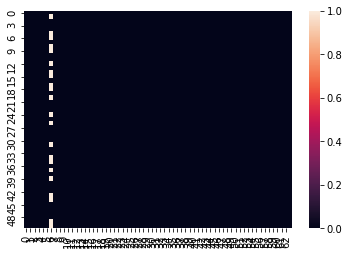

In [113]:
# check for NA
sns.heatmap(cleaned_data.reset_index().isna(), xticklabels=range(0, cleaned_data.shape[1]))

In [114]:
cleaned_data.fillna(0, inplace=True)

In [119]:
#(cleaned-cleaned.min())/(cleaned.max()-cleaned.min())
normalized_df= (cleaned_data-cleaned_data.min())/(cleaned_data.max()-cleaned_data.min())

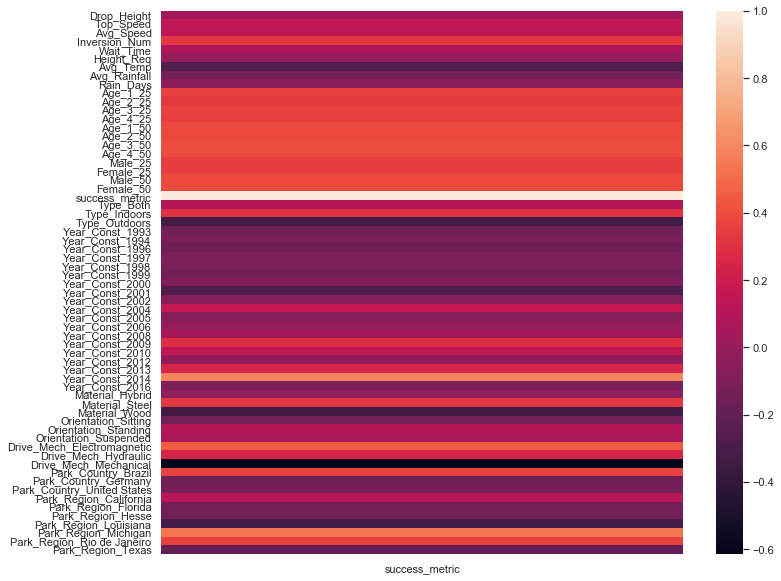

In [132]:
corr = normalized_df.corr()
sns.heatmap(pd.DataFrame(corr["success_metric"]), yticklabels=True)
sns.set(rc={'figure.figsize':(11.7,15)})

In [136]:
# export dataset to create model in R
normalized_df.to_csv("normalized_coaster_data.csv")